In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import netCDF4 as nc
from netCDF4 import Dataset
import os

/home/resifis/anaconda3/envs/kaustenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATAPATH = os.environ.get("DATAPATH","/home/resifis/Desktop/kaustcode/Packages/clean_data")
OUTPUTDATAPATH = os.environ.get("OUTPUTDATAPATH",'/home/resifis/Desktop/kaustcode/Packages/processed_clean_data')

In [3]:
data_path = os.path.join(DATAPATH,"GHI_2010-2019_new.nc") 
GHI_netcdf = Dataset(data_path,mode = 'r')

In [4]:
GHI = np.array(GHI_netcdf.variables["GHI"][:])
array_data = GHI.reshape((GHI.shape[0],GHI.shape[2],GHI.shape[3]))
#(87624, 213, 288)

In [5]:
idx = np.flatnonzero((array_data == 0.0).all((1,2)))

In [6]:
time = np.array(GHI_netcdf.variables["time"][:])

In [7]:
new_time = np.delete(time,idx,axis = 0)

In [8]:
time_len = new_time.shape[0]

In [9]:
lon_len = GHI_netcdf.variables["lon"].shape[0]
lat_len = GHI_netcdf.variables["lat"].shape[0]

In [10]:
lat_len

213

# Cloud Thickness

In [11]:
data_path = os.path.join(DATAPATH,"Cloud_thickness_2010-2019.nc") 
thickness_netcdf = Dataset(data_path,mode = 'r')

In [12]:
thickness_data = np.array(thickness_netcdf.variables['CT'][:,:,:])
new_thickness_data = np.delete(thickness_data,idx,axis = 0)

In [13]:
thickness_outpath = os.path.join(OUTPUTDATAPATH,"thickness.nc")
new_thickness_netcdf = nc.Dataset(thickness_outpath,'w', format='NETCDF4')
# Create dimensions
new_thickness_netcdf.createDimension('lon',288)
new_thickness_netcdf.createDimension('lat',213 )
new_thickness_netcdf.createDimension('time',time_len)
# Create Variables
time = new_thickness_netcdf.createVariable('time', 'i4', 'time')
longitude = new_thickness_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_thickness_netcdf.createVariable('lat', 'f4', 'lat')  
thickness_clean = new_thickness_netcdf.createVariable('thickness', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
thickness_clean[:,:,:] = new_thickness_data[:,:,:-1]

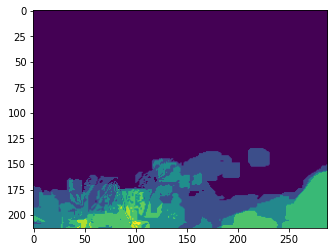

In [14]:
test = Dataset(thickness_outpath,model = 'r')
plt.imshow(np.array(test.variables['thickness'][10,:,:]))

# DT2

In [3]:
data_path = os.path.join(DATAPATH,"DT2_2010-2019.nc") 
dt2cloud_netcdf = Dataset(data_path,mode = 'r')

In [12]:
dt2_data = np.array(dt2cloud_netcdf.variables['td2m'][:,:,:])
new_dt2_data = np.delete(dt2_data,idx,axis = 0)

In [13]:
dt2_outpath = os.path.join(OUTPUTDATAPATH,"dt2.nc")
new_dt2_netcdf = nc.Dataset(dt2_outpath,'w', format='NETCDF4')
# Create dimensions
new_dt2_netcdf.createDimension('lon',288)
new_dt2_netcdf.createDimension('lat',213 )
new_dt2_netcdf.createDimension('time',time_len)
# Create Variables
time = new_dt2_netcdf.createVariable('time', 'i4', 'time')
longitude = new_dt2_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_dt2_netcdf.createVariable('lat', 'f4', 'lat')  
dt2_clean = new_dt2_netcdf.createVariable('td2', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
dt2_clean[:,:,:] = new_dt2_data[:,:,:-1]

In [14]:
dt2_clean.shape

(48222, 213, 288)

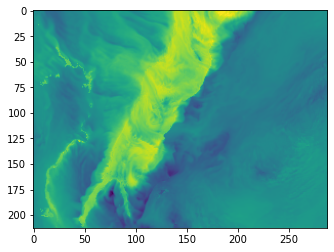

In [15]:
test = Dataset(dt2_outpath,model = 'r')
plt.imshow(np.array(test.variables['td2'][10,:,:]))

# MSLP

In [11]:
data_path = os.path.join(DATAPATH,"MSLP_2010-2019.nc") 
mslpcloud_netcdf = Dataset(data_path,mode = 'r')

In [12]:
mslp_data = np.array(mslpcloud_netcdf.variables['mslp'][:,:,:])
new_mslp_data = np.delete(mslp_data,idx,axis = 0)

In [13]:
mslp_outpath = os.path.join(OUTPUTDATAPATH,"mslp.nc")
new_mslp_netcdf = nc.Dataset(mslp_outpath,'w', format='NETCDF4')
# Create dimensions
new_mslp_netcdf.createDimension('lon',288)
new_mslp_netcdf.createDimension('lat',213 )
new_mslp_netcdf.createDimension('time',time_len)
# Create Variables
time = new_mslp_netcdf.createVariable('time', 'i4', 'time')
longitude = new_mslp_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_mslp_netcdf.createVariable('lat', 'f4', 'lat')  
mslp_clean = new_mslp_netcdf.createVariable('mslp', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
mslp_clean[:,:,:] = new_mslp_data[:,:,:-1]

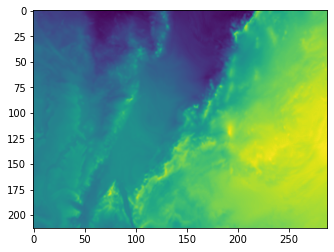

In [14]:
test = Dataset(mslp_outpath,model = 'r')
plt.imshow(np.array(test.variables['mslp'][10,:,:]))

# T2

In [15]:
data_path = os.path.join(DATAPATH,"T2_2010-2019.nc") 
t2_netcdf = Dataset(data_path,mode = 'r')

In [16]:
t2_data = np.array(t2_netcdf.variables['t2m'][:,:,:])
new_t2_data = np.delete(t2_data,idx,axis = 0)

In [17]:
t2_outpath = os.path.join(OUTPUTDATAPATH,"t2.nc")
new_t2_netcdf = nc.Dataset(t2_outpath,'w', format='NETCDF4')
# Create dimensions
new_t2_netcdf.createDimension('lon',288)
new_t2_netcdf.createDimension('lat',213 )
new_t2_netcdf.createDimension('time',time_len)
# Create Variables
time = new_t2_netcdf.createVariable('time', 'i4', 'time')
longitude = new_t2_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_t2_netcdf.createVariable('lat', 'f4', 'lat')  
t2_clean = new_t2_netcdf.createVariable('t2', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
t2_clean[:,:,:] = new_t2_data[:,:,:-1]

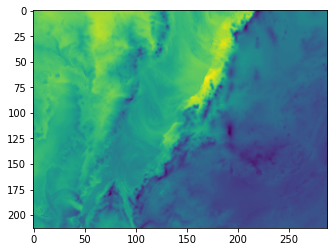

In [18]:
test = Dataset(t2_outpath,model = 'r')
plt.imshow(np.array(test.variables['t2'][10,:,:]))

# Rain

In [11]:
data_path = os.path.join(DATAPATH,"Rain_2010-2019.nc") 
rain_netcdf = Dataset(data_path,mode = 'r')

In [12]:
rain_data = np.array(rain_netcdf.variables['PRATE_surface'][:,:,:])
new_rain_data = np.delete(rain_data,idx,axis = 0)

In [13]:
rain_outpath = os.path.join(OUTPUTDATAPATH,"rain.nc")
new_rain_netcdf = nc.Dataset(rain_outpath,'w', format='NETCDF4')
# Create dimensions
new_rain_netcdf.createDimension('lon',288)
new_rain_netcdf.createDimension('lat',213 )
new_rain_netcdf.createDimension('time',time_len)
# Create Variables
time = new_rain_netcdf.createVariable('time', 'i4', 'time')
longitude = new_rain_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_rain_netcdf.createVariable('lat', 'f4', 'lat')  
rain_clean = new_rain_netcdf.createVariable('rain', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
rain_clean[:,:,:] = new_rain_data[:,:,:-1]

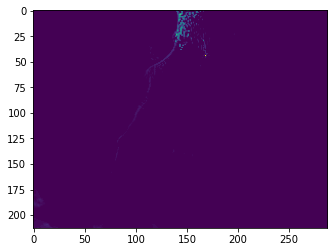

In [14]:
test = Dataset(rain_outpath,model = 'r')
plt.imshow(np.array(test.variables['rain'][50,:,:]))

# Wind direction

In [15]:
data_path = os.path.join(DATAPATH,"WD_2010-2019.nc") 
WD_netcdf = Dataset(data_path,mode = 'r')

In [16]:
WD_data = np.array(WD_netcdf.variables['u10m'][:,:,:])
new_WD_data = np.delete(WD_data,idx,axis = 0)

In [17]:
WD_outpath = os.path.join(OUTPUTDATAPATH,"WD.nc")
new_WD_netcdf = nc.Dataset(WD_outpath,'w', format='NETCDF4')
# Create dimensions
new_WD_netcdf.createDimension('lon',288)
new_WD_netcdf.createDimension('lat',213 )
new_WD_netcdf.createDimension('time',time_len)
# Create Variables
time = new_WD_netcdf.createVariable('time', 'i4', 'time')
longitude = new_WD_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_WD_netcdf.createVariable('lat', 'f4', 'lat')  
WD_clean = new_WD_netcdf.createVariable('WD', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
WD_clean[:,:,:] = new_WD_data[:,:,:-1]

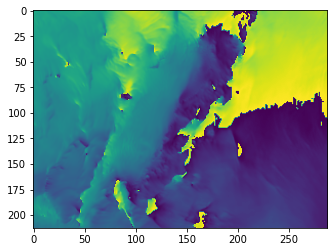

In [18]:
test = Dataset(WD_outpath,model = 'r')
plt.imshow(np.array(test.variables['WD'][20,:,:]))

# Wind Speed

In [19]:
data_path = os.path.join(DATAPATH,"WS_2010-2019.nc") 
WS_netcdf = Dataset(data_path,mode = 'r')

In [20]:
WS_data = np.array(WS_netcdf.variables['ws'][:,:,:])
new_WS_data = np.delete(WS_data,idx,axis = 0)

In [21]:
WS_outpath = os.path.join(OUTPUTDATAPATH,"WS.nc")
new_WS_netcdf = nc.Dataset(WS_outpath,'w', format='NETCDF4')
# Create dimensions
new_WS_netcdf.createDimension('lon',288)
new_WS_netcdf.createDimension('lat',213 )
new_WS_netcdf.createDimension('time',time_len)
# Create Variables
time = new_WS_netcdf.createVariable('time', 'i4', 'time')
longitude = new_WS_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_WS_netcdf.createVariable('lat', 'f4', 'lat')  
WS_clean = new_WS_netcdf.createVariable('WS', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
WS_clean[:,:,:] = new_WS_data[:,:,:-1]

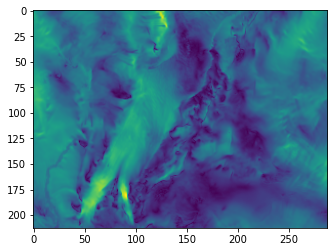

In [22]:
test = Dataset(WS_outpath,model = 'r')
plt.imshow(np.array(test.variables['WS'][30,:,:]))

# GHI

In [12]:
data_path = os.path.join(DATAPATH,"GHI_2010-2019_new.nc") 
ghicloud_netcdf = Dataset(data_path,mode = 'r')
ghi_data = np.array(ghicloud_netcdf.variables['GHI'][:,:,:])

In [13]:
new_ghi_data = np.delete(ghi_data,idx,axis = 0)

In [14]:
ghi_outpath = os.path.join(OUTPUTDATAPATH,"ghi.nc")
new_ghi_netcdf = nc.Dataset(ghi_outpath,'w', format='NETCDF4')
# Create dimensions
new_ghi_netcdf.createDimension('lon',288)
new_ghi_netcdf.createDimension('lat',213 )
new_ghi_netcdf.createDimension('time',time_len)
# Create Variables
time = new_ghi_netcdf.createVariable('time', 'i4', 'time')
longitude = new_ghi_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_ghi_netcdf.createVariable('lat', 'f4', 'lat')  
ghi_clean = new_ghi_netcdf.createVariable('ghi', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
ghi_clean[:,:,:] = new_ghi_data[:,:,:]

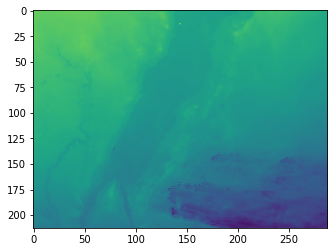

In [18]:
test = Dataset(ghi_outpath,model = 'r')
plt.imshow(np.array(test.variables['ghi'][19,:,:]))

# DNI

In [13]:
data_path = os.path.join(DATAPATH,"DNI_2010-2019_new.nc") 
dnicloud_netcdf = Dataset(data_path,mode = 'r')
dni_data = np.array(dnicloud_netcdf.variables['DNI'][:,:,:])

In [14]:
dni_data = np.delete(dni_data,idx,axis = 0)

In [15]:
dni_outpath = os.path.join(OUTPUTDATAPATH,"dni.nc")
new_dni_netcdf = nc.Dataset(dni_outpath,'w', format='NETCDF4')
# Create dimensions
new_dni_netcdf.createDimension('lon',288)
new_dni_netcdf.createDimension('lat',213 )
new_dni_netcdf.createDimension('time',time_len)
# Create Variables
time = new_dni_netcdf.createVariable('time', 'i4', 'time')
longitude = new_dni_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_dni_netcdf.createVariable('lat', 'f4', 'lat')  
dni_clean = new_dni_netcdf.createVariable('dni', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
dni_clean[:,:,:] = dni_data[:,:,:]

In [16]:
test = Dataset(dni_outpath,model = 'r')

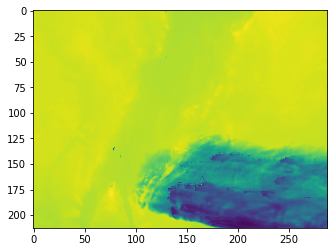

In [18]:
plt.imshow(np.array(test.variables['dni'][19,:,:]))

# DHI

In [19]:
data_path = os.path.join(DATAPATH,"DHI_2010-2019_new.nc") 
dhicloud_netcdf = Dataset(data_path,mode = 'r')
dhi_data = np.array(dhicloud_netcdf.variables['DHI'][:,:,:,:])

In [20]:
dhi_data = dhi_data.reshape((dhi_data.shape[0],dhi_data.shape[2],dhi_data.shape[3]))

In [21]:
dhi_data.shape

(87624, 213, 288)

In [22]:
dhi_data = np.delete(dhi_data,idx,axis = 0)

In [23]:
dhi_outpath = os.path.join(OUTPUTDATAPATH,"dhi.nc")
new_dhi_netcdf = nc.Dataset(dhi_outpath,'w', format='NETCDF4')
# Create dimensions
new_dhi_netcdf.createDimension('lon',288)
new_dhi_netcdf.createDimension('lat',213 )
new_dhi_netcdf.createDimension('time',time_len)
# Create Variables
time = new_dhi_netcdf.createVariable('time', 'i4', 'time')
longitude = new_dhi_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_dhi_netcdf.createVariable('lat', 'f4', 'lat')  
dhi_clean = new_dhi_netcdf.createVariable('dhi', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
dhi_clean[:,:,:] = dhi_data[:,:,:]

In [24]:
test = Dataset(dhi_outpath,model = 'r')

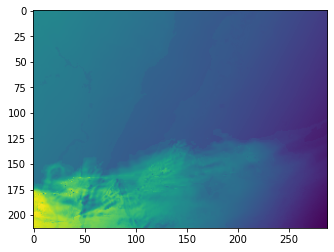

In [25]:
plt.imshow(np.array(test.variables['dhi'][10,:,:]))

# Hclouds

In [26]:
data_path = os.path.join(DATAPATH,"High_cloud_2010-19_new.nc") 
hcloud_netcdf = Dataset(data_path,mode = 'r')

In [27]:
hcloud_data = np.array(hcloud_netcdf.variables['hcdc'][:,:,:])

In [28]:
new_hcloud_data = np.delete(hcloud_data,idx,axis = 0)

In [29]:
new_hcloud_data[:,:,:-1].shape

(48222, 213, 288)

In [30]:
hcloud_outpath =  os.path.join(OUTPUTDATAPATH,"hcloud.nc")
new_hcloud_netcdf = nc.Dataset(hcloud_outpath,'w', format='NETCDF4')
# Create dimensions
new_hcloud_netcdf.createDimension('lon',288)
new_hcloud_netcdf.createDimension('lat',213 )
new_hcloud_netcdf.createDimension('time',time_len)
# Create Variables
time = new_hcloud_netcdf.createVariable('time', 'i4', 'time')
longitude = new_hcloud_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_hcloud_netcdf.createVariable('lat', 'f4', 'lat')  
hcloud_clean = new_hcloud_netcdf.createVariable('cc', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
hcloud_clean[:,:,:] = new_hcloud_data[:,:,:-1]

In [31]:
test = Dataset(hcloud_outpath,model = 'r')

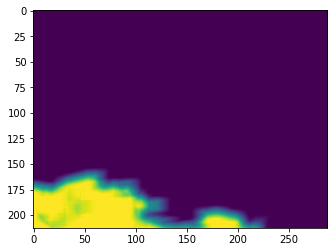

In [32]:
plt.imshow(np.array(test.variables['cc'][6,:,:]))

# mCloud

In [33]:
data_path = os.path.join(DATAPATH,"Medium_cloud_2010-19_new.nc") 
mcloud_netcdf = Dataset(data_path,mode = 'r')
mcloud_data = np.array(mcloud_netcdf.variables['mcdc'][:,:,:])

In [34]:
mcloud_data.max()

100.0

In [35]:
new_mcloud_data = np.delete(mcloud_data,idx,axis = 0)

In [36]:
new_mcloud_data.max()

100.0

In [37]:
mcloud_outpath = os.path.join(OUTPUTDATAPATH,"mcloud.nc")
new_mcloud_netcdf = nc.Dataset(mcloud_outpath,'w', format='NETCDF4')
# Create dimensions
new_mcloud_netcdf.createDimension('lon',288)
new_mcloud_netcdf.createDimension('lat',213 )
new_mcloud_netcdf.createDimension('time',time_len)
# Create Variables
time = new_mcloud_netcdf.createVariable('time', 'i4', 'time')
longitude = new_mcloud_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_mcloud_netcdf.createVariable('lat', 'f4', 'lat')  
mcloud_clean = new_mcloud_netcdf.createVariable('cc', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
mcloud_clean[:,:,:] = new_mcloud_data[:,:,:-1]

In [38]:
test = Dataset(mcloud_outpath,model = 'r')

In [39]:
cc = np.array(test.variables['cc'][:,:,:])

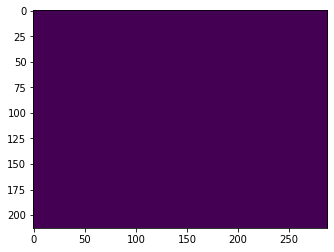

In [40]:
plt.imshow(np.array(test.variables['cc'][5,:,:]))

# lcloud

In [41]:
data_path = os.path.join(DATAPATH,"Low_cloud_2010-19_new.nc") 
lcloud_netcdf = Dataset(data_path,mode = 'r')
lcloud_data = np.array(lcloud_netcdf.variables['lcdc'][:,:,:])
new_lcloud_data = np.delete(lcloud_data,idx,axis = 0)

In [42]:
lcloud_outpath = os.path.join(OUTPUTDATAPATH,"lcloud.nc")
new_lcloud_netcdf = nc.Dataset(lcloud_outpath,'w', format='NETCDF4')
# Create dimensions
new_lcloud_netcdf.createDimension('lon',288)
new_lcloud_netcdf.createDimension('lat',213 )
new_lcloud_netcdf.createDimension('time',time_len)
# Create Variables
time = new_lcloud_netcdf.createVariable('time', 'i4', 'time')
longitude = new_lcloud_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_lcloud_netcdf.createVariable('lat', 'f4', 'lat')  
lcloud_clean = new_lcloud_netcdf.createVariable('cc', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
lcloud_clean[:,:,:] = new_lcloud_data[:,:,:-1]

In [43]:
test = Dataset(lcloud_outpath,model = 'r')

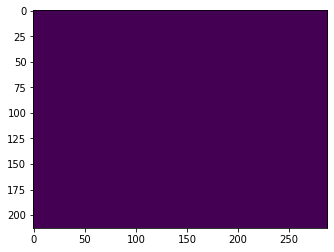

In [44]:
plt.imshow(np.array(test.variables['cc'][5,:,:]))

# AOD

In [45]:
data_path = os.path.join(DATAPATH,"AOD_2010-2019_VI_new.nc") 
aod_netcdf = Dataset(data_path,mode = 'r')
aod_data = np.array(aod_netcdf.variables['aod5503d'][:,:,:])
new_aod_data = np.delete(aod_data,idx,axis = 0)

In [46]:
aod_outpath = os.path.join(OUTPUTDATAPATH,"aod.nc")
new_aod_netcdf = nc.Dataset(aod_outpath,'w', format='NETCDF4')
# Create dimensions
new_aod_netcdf.createDimension('lon',288)
new_aod_netcdf.createDimension('lat',213 )
new_aod_netcdf.createDimension('time',time_len)
# Create Variables
time = new_aod_netcdf.createVariable('time', 'i4', 'time')
longitude = new_aod_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_aod_netcdf.createVariable('lat', 'f4', 'lat')  
aod_clean = new_aod_netcdf.createVariable('aod5503d', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
aod_clean[:,:,:] = new_aod_data[:,:,:]

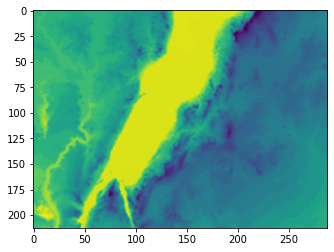

In [47]:
test = Dataset(aod_outpath,model = 'r')
plt.imshow(np.array(test.variables['aod5503d'][5,:,:]))

# Ozone

In [48]:
data_path = os.path.join(DATAPATH,"O3_2010-2019_VI_new.nc") 
ozone_netcdf = Dataset(data_path,mode = 'r')
ozone_data = np.array(ozone_netcdf.variables['o3rad'][:,:,:])
new_ozone_data = np.delete(ozone_data,idx,axis = 0)

In [49]:
ozone_outpath = os.path.join(OUTPUTDATAPATH,"ozone.nc")
new_ozone_netcdf = nc.Dataset(ozone_outpath,'w', format='NETCDF4')
# Create dimensions
new_ozone_netcdf.createDimension('lon',288)
new_ozone_netcdf.createDimension('lat',213 )
new_ozone_netcdf.createDimension('time',time_len)
# Create Variables
time = new_ozone_netcdf.createVariable('time', 'i4', 'time')
longitude = new_ozone_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_ozone_netcdf.createVariable('lat', 'f4', 'lat')  
ozone_clean = new_ozone_netcdf.createVariable('o3rad', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
ozone_clean[:,:,:] = new_ozone_data[:,:,:]

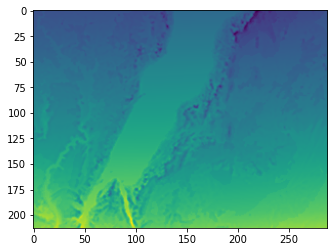

In [50]:
test = Dataset(ozone_outpath,model = 'r')
plt.imshow(np.array(test.variables['o3rad'][5,:,:]))

# water_vapor

In [11]:
data_path = os.path.join(DATAPATH,"Qvapor_2010-2019_VI_new.nc") 
water_vapor_netcdf = Dataset(data_path,mode = 'r')
water_vapor_data = np.array(water_vapor_netcdf.variables['qvapor'][:,:,:])
new_water_vapor_data = np.delete(water_vapor_data,idx,axis = 0)

In [12]:
water_vapor_outpath = os.path.join(OUTPUTDATAPATH,"water_vapor_new.nc")
new_water_vapor_netcdf = nc.Dataset(water_vapor_outpath,'w', format='NETCDF4')
# Create dimensions
new_water_vapor_netcdf.createDimension('lon',288)
new_water_vapor_netcdf.createDimension('lat',213 )
new_water_vapor_netcdf.createDimension('time',time_len)
# Create Variables
time = new_water_vapor_netcdf.createVariable('time', 'i4', 'time')
longitude = new_water_vapor_netcdf.createVariable('lon', 'f4', 'lon')
latitude = new_water_vapor_netcdf.createVariable('lat', 'f4', 'lat')  
water_vapor_clean = new_water_vapor_netcdf.createVariable('qvapor', 'f4', ('time', 'lat', 'lon'))
# Add values to the varialbes
longitude[:] = np.array(GHI_netcdf.variables["lon"][:])
latitude[:] = np.array(GHI_netcdf.variables["lat"][:])
water_vapor_clean[:,:,:] = new_water_vapor_data[:,:,:]

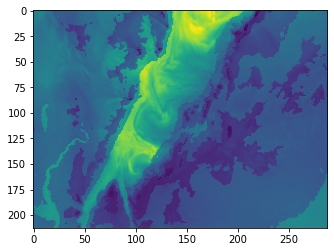

In [13]:
test = Dataset(water_vapor_outpath,model = 'r')
plt.imshow(np.array(test.variables['qvapor'][5,:,:]))